In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def processData(path):
    with open(path) as file:
        lines = file.readlines()
        lines = [line.rstrip() for line in lines]

    cols = lines[0].split("\t")
    data = lines[2:]
    
    frame = []
    for i in data:
        row = i.split("\t")
        if len(row) > 11:
            pass
        else:
            frame.append(row)
    messages = pd.DataFrame(frame, columns = cols)
    
    return messages

In [3]:
path = "../Data/Gawaher/Gawaher.txt"

messages = processData(path)

# Analysis

In [4]:
messages.head()

,﻿MessageID,ThreadID,ThreadName,MemberID,MemberName,Message,P_Year,P_Month,P_Day,P_Date,ThreadFirstMessageID
0,100,37,Speaking Without Knowledge,Arwa,Arwa,Speaking Without Knowledge -------------------...,2004,10,25,2004-10-25 01:01:00.000,100
1,1000,240,Music in Islam,Moustafa,Moustafa,"<quote>Quote Assalaamualaikum, Regardless of w...",2004,10,25,2004-10-25 18:22:00.000,806
2,10000,200,Start From Scratch,Keeping Faith,Keeping Faith,Insha'Allah. :w:,2004,11,03,2004-11-03 11:14:00.000,596
3,100001,10742,To Be A Mother,ahm,ahm,"I like that bit when youcall ""Mum"" she drops e...",2005,03,26,2005-03-26 07:43:00.000,99884
4,100002,10703,Which Prophet Is The Verse...,Jawharah,Jawharah,Pretty sure I got this right. Good question si...,2005,03,26,2005-03-26 08:04:00.000,99483


In [5]:
threads = messages["ThreadID"].unique()

In [7]:
threadLengths = []

for i in threads:
    threadLengths.append(messages[messages["ThreadID"] == i].shape[0])

6.997332531840553
2.0


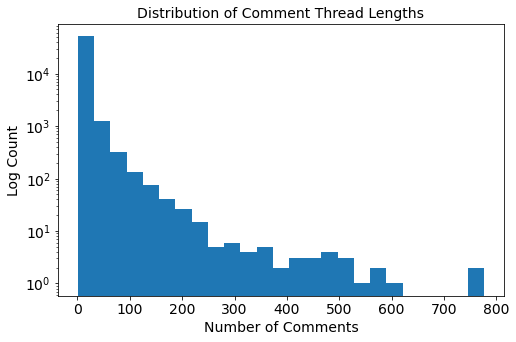

In [42]:
plt.figure(figsize = (8,5))
plt.hist(threadLengths, bins = 25)
plt.yscale("log")
plt.ylabel("Log Count", fontsize = 14)
plt.xlabel("Number of Comments", fontsize = 14)
plt.title("Distribution of Comment Thread Lengths", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.savefig("Images/ThreadLengths.png")


print(np.mean(threadLengths))
print(np.median(threadLengths))

In [48]:
sum(np.array(threadLengths) > 30)

1982

In [9]:
#Only want threads with length > 1
replies = messages[messages.duplicated(subset=['ThreadID'], keep=False)]

In [26]:
len(replies)

351956

In [10]:
replyLengths = []
replyThreads = replies["ThreadID"].unique()
for i in threads:
    replyLengths.append(len(replies[replies["ThreadID"] == i]))



10.765155686058604
5.0


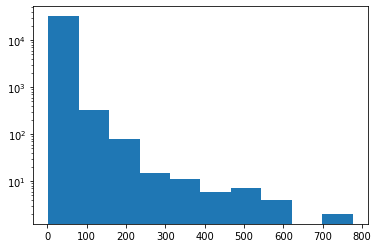

In [11]:
replyLengths = np.array(replyLengths)
replyLengths = replyLengths[replyLengths > 0]
plt.hist(replyLengths)
plt.yscale("log")

print(np.mean(replyLengths))
print(np.median(replyLengths))

In [12]:
replies.head()

,﻿MessageID,ThreadID,ThreadName,MemberID,MemberName,Message,P_Year,P_Month,P_Day,P_Date,ThreadFirstMessageID
0,100,37,Speaking Without Knowledge,Arwa,Arwa,Speaking Without Knowledge -------------------...,2004,10,25,2004-10-25 01:01:00.000,100
1,1000,240,Music in Islam,Moustafa,Moustafa,"<quote>Quote Assalaamualaikum, Regardless of w...",2004,10,25,2004-10-25 18:22:00.000,806
2,10000,200,Start From Scratch,Keeping Faith,Keeping Faith,Insha'Allah. :w:,2004,11,03,2004-11-03 11:14:00.000,596
3,100001,10742,To Be A Mother,ahm,ahm,"I like that bit when youcall ""Mum"" she drops e...",2005,03,26,2005-03-26 07:43:00.000,99884
4,100002,10703,Which Prophet Is The Verse...,Jawharah,Jawharah,Pretty sure I got this right. Good question si...,2005,03,26,2005-03-26 08:04:00.000,99483


In [13]:
members = replies["MemberID"].unique()

In [14]:
connections = []
for i in members:
    length = len(replies["ThreadID"][replies["MemberID"] == i])
    connections.append(length)
    

43.40848544647262
2.0
1


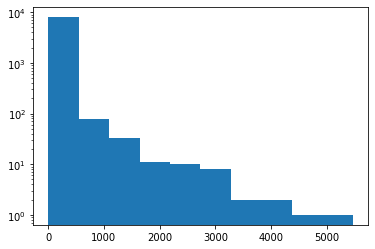

In [15]:
plt.hist(connections)
plt.yscale("log")
print(np.mean(connections))
print(np.median(connections))
print(np.min(connections))

# Data Cleaning

In [45]:
#Only want threads with connecting members
replies = messages[messages.duplicated(subset=['ThreadID'], keep=False)]
connected = replies[replies.duplicated(subset=['MemberID'], keep=False)]

In [46]:
threads = connected["ThreadID"].unique()

In [47]:
lengths = connected["ThreadID"].value_counts()[threads]

In [48]:
largeThreads = threads[np.array(lengths) > 30]
len(largeThreads)

11818

In [49]:
cleanConnected = connected[connected["ThreadID"].isin(largeThreads)]

In [50]:
cleanConnected.to_csv("Ummah.csv")